Here's the Qiskit code to determine if a graph is Eulerian or half-Odd-half-Even using the Deutsch-Jozsa algorithm, along with an example demonstration

In [83]:
import qiskit
print(qiskit.version.get_version_info())

C:\Users\slipo\anaconda3\envs\old_qiskit\lib\site-packages\qiskit\circuit\equivalence.py:18: DeprecationWarning: The retworkx package is deprecated and has been renamed to rustworkx. Rustworkx is a drop-in replacement and can be used by replacing `import retworkx` with import `rustworkx`. 
  import retworkx as rx
C:\Users\slipo\anaconda3\envs\old_qiskit\lib\site-packages\qiskit\version.py:20: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


0.18.1


In [84]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit.library import Diagonal

def deutsch_jozsa_graph_check(n, diagonal):
    """
    Constructs the Deutsch-Jozsa circuit for graph parity checking.
    Args:
        n (int): Number of qubits (log2 of vertices)
        diagonal (list): Diagonal elements defining the oracle
    Returns:
        QuantumCircuit: Configured quantum circuit
    """
    qc = QuantumCircuit(n)
    qc.h(range(n))  # Apply Hadamard to all qubits
    
    # Add the oracle (phase encoding of degree parity)
    qc.append(Diagonal(diagonal), range(n))
    
    qc.h(range(n))  # Apply Hadamard again
    qc.measure_all()
    return qc

# Example 1: Eulerian Graph (Constant function)
n = 2
constant_diagonal = [1,1,1,1]  # All degrees even
qc_constant = deutsch_jozsa_graph_check(n, constant_diagonal)

# Example 2: Half-Odd-half-Even Graph (Balanced function)
balanced_diagonal = [1,1,-1,-1]  # Degrees alternate even/odd
qc_balanced = deutsch_jozsa_graph_check(n, balanced_diagonal)

# Execute both circuits
simulator = Aer.get_backend('qasm_simulator')

# Run constant example
result_constant = execute(qc_constant, simulator, shots=1024).result()
print("Eulerian graph result (constant function):")
print(result_constant.get_counts())

# Run balanced example
result_balanced = execute(qc_balanced, simulator, shots=1024).result()
print("\nHalf-Odd-half-Even graph result (balanced function):")
print(result_balanced.get_counts())

Eulerian graph result (constant function):
{'00': 1024}

Half-Odd-half-Even graph result (balanced function):
{'10': 1024}


In [85]:
print(qc_constant)

        ┌───┐┌───────────┐┌───┐ ░ ┌─┐   
   q_0: ┤ H ├┤0          ├┤ H ├─░─┤M├───
        ├───┤│  Diagonal │├───┤ ░ └╥┘┌─┐
   q_1: ┤ H ├┤1          ├┤ H ├─░──╫─┤M├
        └───┘└───────────┘└───┘ ░  ║ └╥┘
meas: 2/═══════════════════════════╩══╩═
                                   0  1 


In [86]:
print(qc_balanced)

        ┌───┐┌───────────┐┌───┐ ░ ┌─┐   
   q_0: ┤ H ├┤0          ├┤ H ├─░─┤M├───
        ├───┤│  Diagonal │├───┤ ░ └╥┘┌─┐
   q_1: ┤ H ├┤1          ├┤ H ├─░──╫─┤M├
        └───┘└───────────┘└───┘ ░  ║ └╥┘
meas: 2/═══════════════════════════╩══╩═
                                   0  1 


**Explanation:**
1. **Eulerian Graph (Constant Function):**
   - All vertices have even degrees
   - Oracle applies no phase changes (`diagonal = [1,1,1,1]`)
   - Measurement always results in `00`, indicating a constant function

2. **Half-Odd-half-Even Graph (Balanced Function):**
   - Half the vertices have odd degrees
   - Oracle applies phase flips to states `10` and `11` (`diagonal = [1,1,-1,-1]`)
   - Measurement results in `10`, indicating a balanced function

**Key Advantages:**
- Classical approach requires Θ(2ⁿ) checks in worst case
- Quantum solution requires only 1 query
- Demonstrates exponential speedup for verifying graph properties

This implementation shows how quantum computing can efficiently solve graph theory problems that would be computationally expensive classically.

# Technical Notes

__Diagonal__: The Diagonal class represents a diagonal unitary gate. A diagonal gate is a special type of quantum gate where all the non-diagonal elements in the matrix representation are zero. This means that the gate only affects the phases of the quantum states and not their amplitudes.

By importing the Diagonal class, you can create and use diagonal gates in your quantum circuits. These gates are useful in various quantum algorithms and can be parameterized to represent different diagonal matrices.

# Eulerian graph example

A Eulerian graph is one where you can start at any vertex and travel along the edges to visit every edge exactly once, and return to the starting vertex. For a graph to be Eulerian, it must satisfy two conditions:

1.	All vertices must have an even degree (an even number of edges connected to them).
  
3.	The graph must be connected, meaning there is a path between any two vertices.


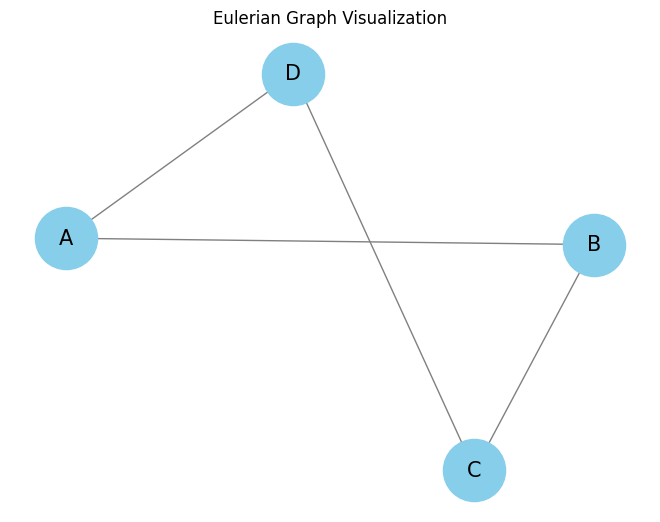

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add edges to the graph
edges = [('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'A')]
G.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', font_size=15, font_color='black')

# Display the graph
plt.title("Eulerian Graph Visualization")
plt.show()

- Another Eulerian graph example

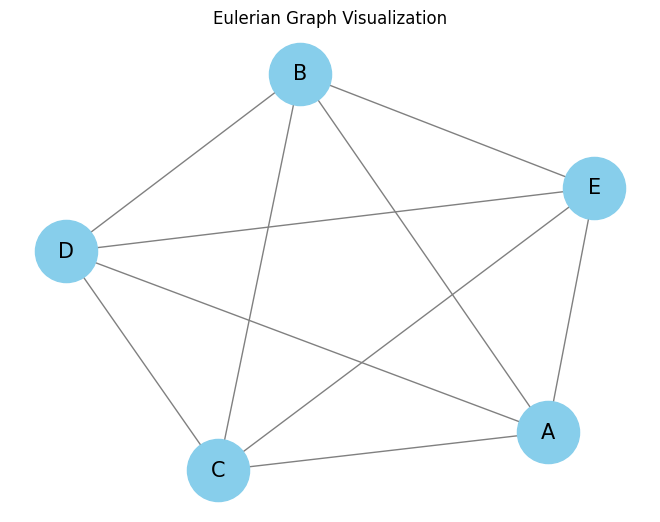

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add edges to the graph
edges = [('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'D'), ('C', 'E'), ('D', 'E')]
G.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', font_size=15, font_color='black')

# Display the graph
plt.title("Eulerian Graph Visualization")
plt.show()

The path: A -> B -> C -> D -> A -> C -> E -> D -> B -> E -> A
covers all edges exactly once and returns to the starting vertex A, satisfying the conditions for an Eulerian circuit.

# Half-Odd Half-Even Graphs

To create a graph where half the nodes have odd degrees and the other half have even degrees, we must ensure the total number of nodes is a multiple of 4 (since the number of odd-degree nodes must be even).

list A: [0, 1, 2, 3]
list B: [4, 5, 6, 7]
4 3 0
Number of odd-degree nodes: 4
odd-degree nodes: [0, 1, 2, 3]
Number of even-degree nodes: 4
even-degree nodes: [4, 5, 6, 7]


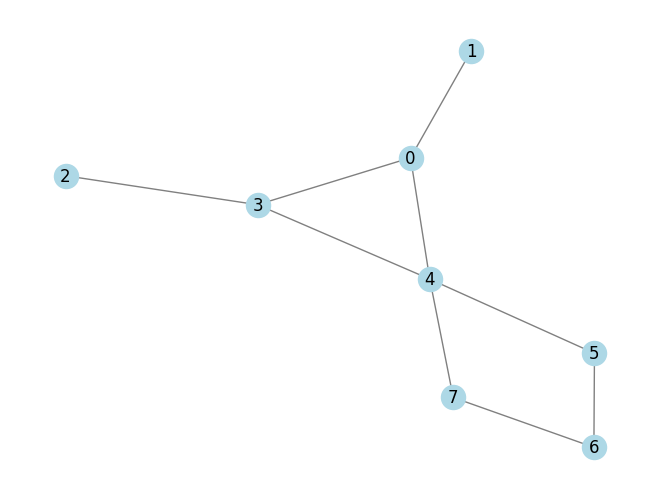

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Number of nodes (must be a multiple of 4)
n = 8

# Create an empty graph
G = nx.Graph()
G.add_nodes_from(range(n))

# Split nodes into two sets A and B
A = list(range(n // 2))
B = list(range(n // 2, n))
print("list A:",A)
print("list B:",B)

# Connect nodes in A as pairs to ensure odd degrees
for i in range(0, len(A), 2):
    G.add_edge(A[i], A[i + 1])

# Connect nodes in B in a cycle to ensure even degrees
for i in range(len(B)):
    G.add_edge(B[i], B[(i + 1) % len(B)])

# Add random edges between A and B to randomize the graph
#num_random_edges = 5  # Adjust this to add more or fewer edges
#for _ in range(num_random_edges):
#    u = random.choice(A)
#    v = random.choice(B)
#    G.add_edge(u, v)
u = random.choice(B)
v1 = random.choice(A)
v2 = random.choice(A)
while v1 == v2 :
    v2 = random.choice(A)
G.add_edge(u, v1)
G.add_edge(u, v2)
G.add_edge(v1, v2)
print(u, v1, v2)

# Verify the number of odd-degree nodes
odd_degrees = [node for node in G.nodes() if G.degree(node) % 2 != 0]
print(f"Number of odd-degree nodes: {len(odd_degrees)}")
print(f"odd-degree nodes:",odd_degrees)

# Verify the number of even-degree nodes
even_degrees = [node for node in G.nodes() if G.degree(node) % 2 == 0]
print(f"Number of even-degree nodes: {len(even_degrees)}")
print(f"even-degree nodes:",even_degrees)

# Draw the graph
pos = nx.spring_layout(G)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()

list A: [0, 1, 2, 3, 4, 5, 6, 7]
list B: [8, 9, 10, 11, 12, 13, 14, 15]
iteration: 1
iteration: 2
Number of odd-degree nodes: 8
odd-degree nodes: [0, 1, 2, 3, 4, 5, 6, 7]
odd-degrees: [3, 1, 3, 1, 3, 1, 3, 1]
Number of even-degree nodes: 8
even-degree nodes: [8, 9, 10, 11, 12, 13, 14, 15]
even-degrees: [2, 2, 2, 2, 4, 2, 2, 4]


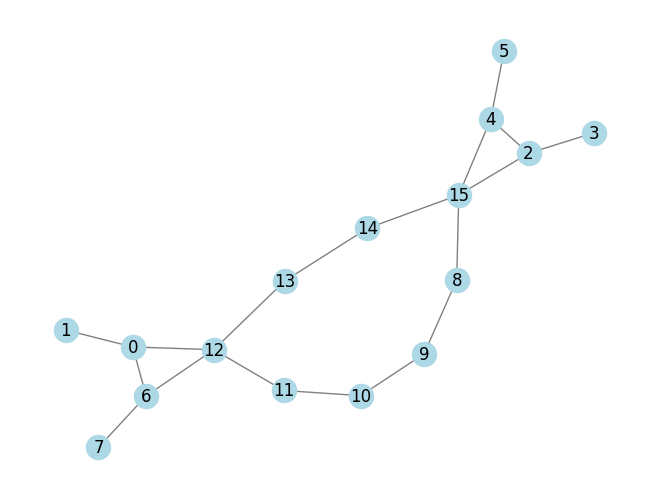

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Number of nodes (must be a multiple of 4)
n = 16

# Create an empty graph
G = nx.Graph()
G.add_nodes_from(range(n))

# Split nodes into two sets A and B
A = list(range(n // 2))
B = list(range(n // 2, n))
print("list A:",A)
print("list B:",B)

# Connect nodes in A as pairs to ensure odd degrees
for i in range(0, len(A), 2):
    G.add_edge(A[i], A[i + 1])

# Connect nodes in B in a cycle to ensure even degrees
for i in range(len(B)):
    G.add_edge(B[i], B[(i + 1) % len(B)])

# Add random edges between A and B to randomize the graph
cutoff = len(A)/4
i=1
while i <=cutoff:
    print("iteration:",i)
    u = random.choice(B)
    v1 = random.choice(A[::2])
    v2 = random.choice(A[::2])
    while v1 == v2 :
        v2 = random.choice(A[::2])
    G.add_edge(u, v1)
    G.add_edge(u, v2)
    G.add_edge(v1, v2)
    B.remove(u)
    A.remove(v1)
    A.remove(v1+1)
    A.remove(v2)
    A.remove(v2+1)
    i +=1

# Verify the number of odd-degree nodes
odd_nodes = [node for node in G.nodes() if G.degree(node) % 2 != 0]
print(f"Number of odd-degree nodes: {len(odd_nodes)}")
print(f"odd-degree nodes:",odd_nodes)
odd_degrees = [G.degree(node) for node in G.nodes() if G.degree(node) % 2 != 0]
print(f"odd-degrees:",odd_degrees)

# Verify the number of even-degree nodes
even_nodes = [node for node in G.nodes() if G.degree(node) % 2 == 0]
print(f"Number of even-degree nodes: {len(even_nodes)}")
print(f"even-degree nodes:",even_nodes)
even_degrees = [G.degree(node) for node in G.nodes() if G.degree(node) % 2 == 0]
print(f"even-degrees:",even_degrees)

# Draw the graph
pos = nx.spring_layout(G)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()

# Final Code

In [75]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def create_half_odd_half_even_degree_random_grap(n):
    # n: Number of nodes (must be a multiple of 4)
    
    # Create an empty graph
    G = nx.Graph()
    G.add_nodes_from(range(n))

    # Split nodes into two sets A and B
    A = list(range(n // 2))
    B = list(range(n // 2, n))
    print("list A:",A)
    print("list B:",B)

    # Connect nodes in A as pairs to ensure odd degrees
    for i in range(0, len(A), 2):
        G.add_edge(A[i], A[i + 1])

    # Connect nodes in B in a cycle to ensure even degrees
    for i in range(len(B)):
        G.add_edge(B[i], B[(i + 1) % len(B)])

    # Add random edges between A and B to randomize the graph
    if len(A) == 2:
        u = random.choice(B)
        v = random.choice(A)
        G.add_edge(u, v)
    else:
        cutoff = len(A)/4
        i=1
        while i <=cutoff:
            print("iteration:",i)
            u = random.choice(B)
            v1 = random.choice(A[::2])
            v2 = random.choice(A[::2])
            while v1 == v2 :
                v2 = random.choice(A[::2])
            G.add_edge(u, v1)
            G.add_edge(u, v2)
            G.add_edge(v1, v2)
            B.remove(u)
            A.remove(v1)
            A.remove(v1+1)
            A.remove(v2)
            A.remove(v2+1)
            i +=1
        
    # Verify the number of odd-degree nodes
    odd_nodes = [node for node in G.nodes() if G.degree(node) % 2 != 0]
    print(f"Number of odd-degree nodes: {len(odd_nodes)}")
    print(f"odd-degree nodes:",odd_nodes)
    odd_degrees = [G.degree(node) for node in G.nodes() if G.degree(node) % 2 != 0]
    print(f"odd-degrees:",odd_degrees)

    # Verify the number of even-degree nodes
    even_nodes = [node for node in G.nodes() if G.degree(node) % 2 == 0]
    print(f"Number of even-degree nodes: {len(even_nodes)}")
    print(f"even-degree nodes:",even_nodes)
    even_degrees = [G.degree(node) for node in G.nodes() if G.degree(node) % 2 == 0]
    print(f"even-degrees:",even_degrees)

    # Draw the graph
    pos = nx.spring_layout(G)  # Layout for better visualization
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.show()
    all_degrees = odd_degrees + even_degrees
    return  [pow(-1, degree %2) for degree in all_degrees]

list A: [0, 1, 2, 3]
list B: [4, 5, 6, 7]
iteration: 1
Number of odd-degree nodes: 4
odd-degree nodes: [0, 1, 2, 3]
odd-degrees: [3, 1, 3, 1]
Number of even-degree nodes: 4
even-degree nodes: [4, 5, 6, 7]
even-degrees: [2, 4, 2, 2]


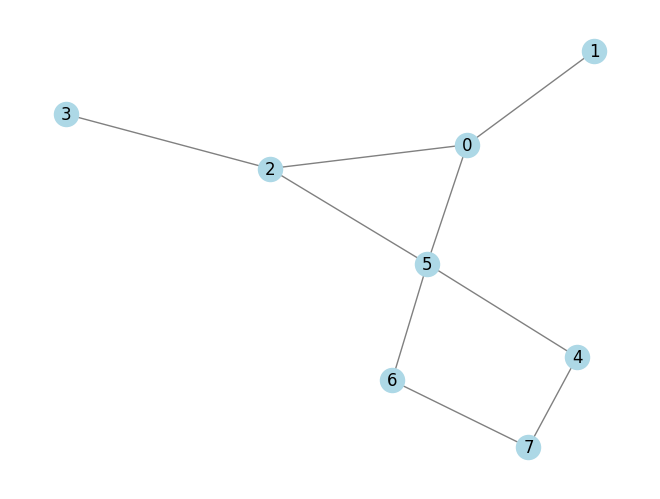

In [76]:
diagonal = create_half_odd_half_even_degree_random_grap(8)

list A: [0, 1]
list B: [2, 3]
Number of odd-degree nodes: 2
odd-degree nodes: [1, 2]
odd-degrees: [1, 1]
Number of even-degree nodes: 2
even-degree nodes: [0, 3]
even-degrees: [2, 2]


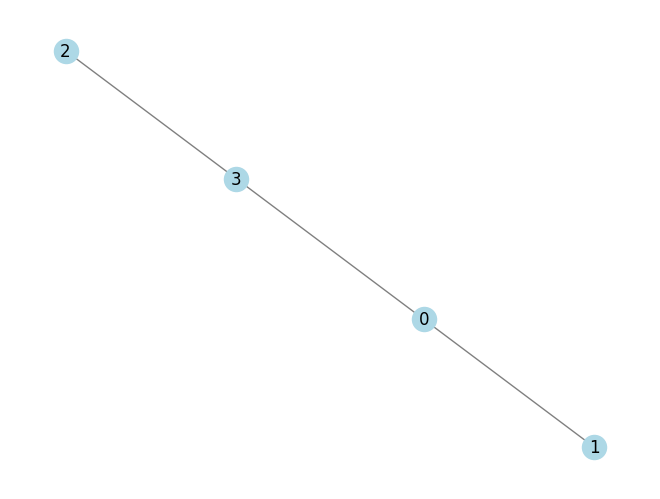

In [77]:
diagonal = create_half_odd_half_even_degree_random_grap(4)

list A: [0, 1, 2, 3, 4, 5, 6, 7]
list B: [8, 9, 10, 11, 12, 13, 14, 15]
iteration: 1
iteration: 2
Number of odd-degree nodes: 8
odd-degree nodes: [0, 1, 2, 3, 4, 5, 6, 7]
odd-degrees: [3, 1, 3, 1, 3, 1, 3, 1]
Number of even-degree nodes: 8
even-degree nodes: [8, 9, 10, 11, 12, 13, 14, 15]
even-degrees: [2, 2, 2, 4, 2, 4, 2, 2]


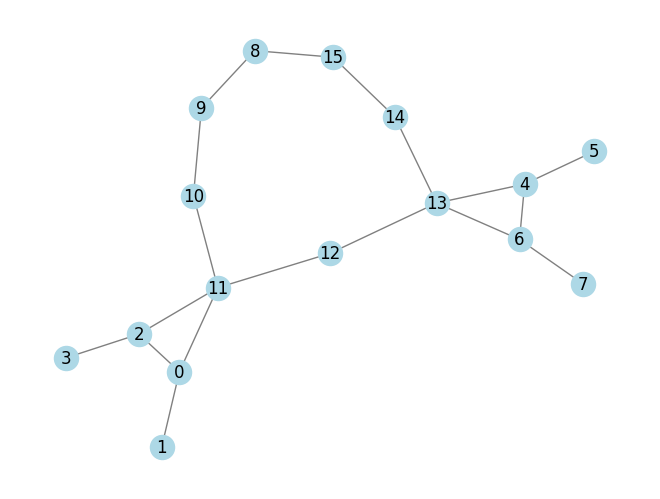

In [78]:
diagonal = create_half_odd_half_even_degree_random_grap(16)

list A: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
list B: [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
iteration: 1
iteration: 2
Number of odd-degree nodes: 10
odd-degree nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
odd-degrees: [3, 1, 3, 1, 1, 1, 3, 1, 3, 1]
Number of even-degree nodes: 10
even-degree nodes: [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
even-degrees: [4, 2, 2, 2, 4, 2, 2, 2, 2, 2]


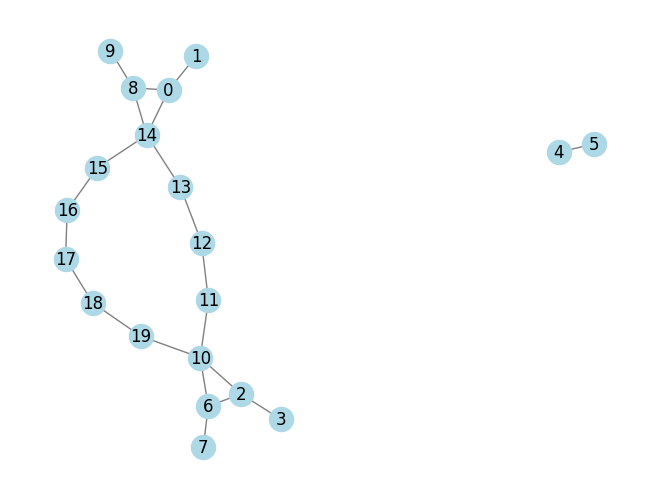

In [79]:
diagonal = create_half_odd_half_even_degree_random_grap(20)

list A: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
list B: [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
iteration: 1
iteration: 2
iteration: 3
Number of odd-degree nodes: 12
odd-degree nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
odd-degrees: [3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1]
Number of even-degree nodes: 12
even-degree nodes: [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
even-degrees: [2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2]


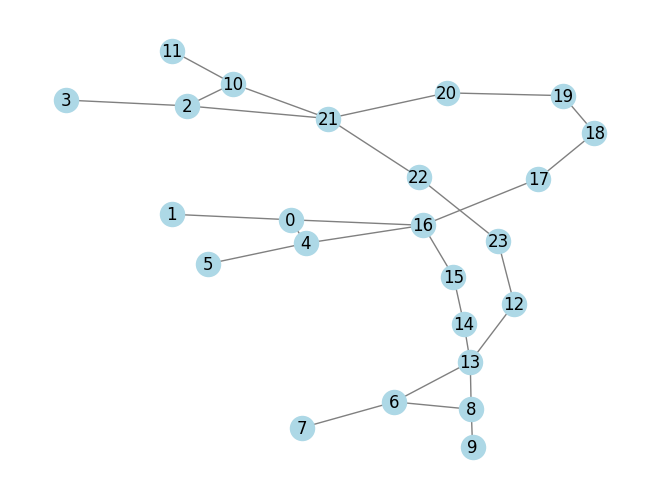

In [80]:
diagonal = create_half_odd_half_even_degree_random_grap(24)

list A: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
list B: [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
iteration: 1
iteration: 2
iteration: 3
iteration: 4
Number of odd-degree nodes: 16
odd-degree nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
odd-degrees: [3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1]
Number of even-degree nodes: 16
even-degree nodes: [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
even-degrees: [4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2]


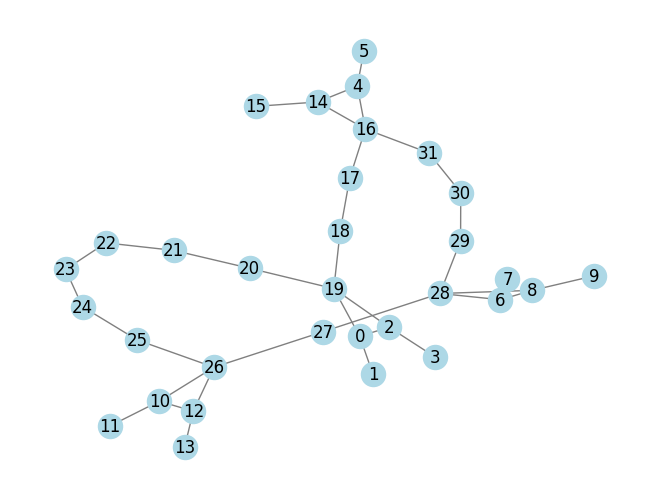

In [117]:
diagonal = create_half_odd_half_even_degree_random_grap(32)

In [118]:
import math
print(diagonal) # for the above graph
n = int(math.log2(len(diagonal)))
print("needed qubits:",n)
qc = deutsch_jozsa_graph_check(n, diagonal)

# Execute both circuits
simulator = Aer.get_backend('qasm_simulator')

# Run constant example
result = execute(qc, simulator, shots=1024).result()
print(result.get_counts())
k = [key for key in result.get_counts().keys()]
if len(result.get_counts().keys()) == 1 and k[0][0] == '1' and int(k[0][1:]) == 0:
    print("\nHalf-Odd-half-Even graph result (balanced function)")
elif len(result.get_counts().keys()) == 1 and int(k[0]) == 0:
    print("Eulerian graph result (constant function)")
else:
    print("Unknown function!")

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
needed qubits: 5
{'10000': 1024}

Half-Odd-half-Even graph result (balanced function)


In [119]:
import math

diagonal = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

n = int(math.log2(len(diagonal)))
print("needed qubits:",n)
qc = deutsch_jozsa_graph_check(n, diagonal)

# Execute both circuits
simulator = Aer.get_backend('qasm_simulator')

# Run constant example
result = execute(qc, simulator, shots=1024).result()
print(result.get_counts())
k = [key for key in result.get_counts().keys()]
if len(result.get_counts().keys()) == 1 and k[0][0] == '1' and int(k[0][1:]) == 0:
    print("\nHalf-Odd-half-Even graph result (balanced function)")
elif len(result.get_counts().keys()) == 1 and int(k[0]) == 0:
    print("Eulerian graph result (constant function)")
else:
    print("Unknown function!")

needed qubits: 4
{'0000': 1024}
Eulerian graph result (constant function)


In [120]:
import math

diagonal = [1,1,1,1,1,1,1,-1,1,1,1,1,1,-1,1,1]

n = int(math.log2(len(diagonal)))
print("needed qubits:",n)
qc = deutsch_jozsa_graph_check(n, diagonal)

# Execute both circuits
simulator = Aer.get_backend('qasm_simulator')

# Run constant example
result = execute(qc, simulator, shots=1024).result()
print(result.get_counts())
k = [key for key in result.get_counts().keys()]
if len(result.get_counts().keys()) == 1 and k[0][0] == '1' and int(k[0][1:]) == 0:
    print("\nHalf-Odd-half-Even graph result (balanced function)")
elif len(result.get_counts().keys()) == 1 and int(k[0]) == 0:
    print("Eulerian graph result (constant function)")
else:
    print("Unknown function!")

needed qubits: 4
{'1111': 70, '0000': 577, '0100': 72, '0001': 72, '1010': 51, '1011': 69, '0101': 51, '1110': 62}
Unknown function!


In [125]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def create_eulerian_grap(n):
    # n: Number of nodes
    
    # Create an empty graph
    G = nx.Graph()
    G.add_nodes_from(range(n))

    B = list(range(n))

    # Connect nodes in B in a cycle to ensure even degrees
    for i in range(n):
        G.add_edge(B[i], B[(i + 1) % len(B)])

    # Draw the graph
    pos = nx.spring_layout(G)  # Layout for better visualization
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.show()   

    degrees = [G.degree(node) for node in G.nodes()]
    return  [pow(-1, degree %2) for degree in degrees]

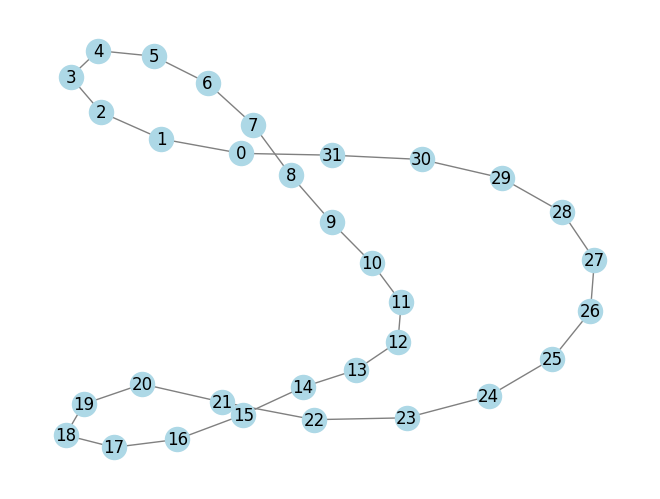

In [126]:
diagonal = create_eulerian_grap(32)

In [129]:
import math
print(diagonal) # for the above graph
n = int(math.log2(len(diagonal)))
print("needed qubits:",n)
qc = deutsch_jozsa_graph_check(n, diagonal)

# Execute both circuits
simulator = Aer.get_backend('qasm_simulator')

# Run constant example
result = execute(qc, simulator, shots=1024).result()
print(result.get_counts())
k = [key for key in result.get_counts().keys()]
if len(result.get_counts().keys()) == 1 and k[0][0] == '1' and int(k[0][1:]) == 0:
    print("\nHalf-Odd-half-Even graph result (balanced function)")
elif len(result.get_counts().keys()) == 1 and int(k[0]) == 0:
    print("Eulerian graph result (constant function)")
else:
    print("Unknown function!")

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
needed qubits: 5
{'00000': 1024}
Eulerian graph result (constant function)
